In [31]:
import matplotlib.pyplot as plt
import math
import numpy

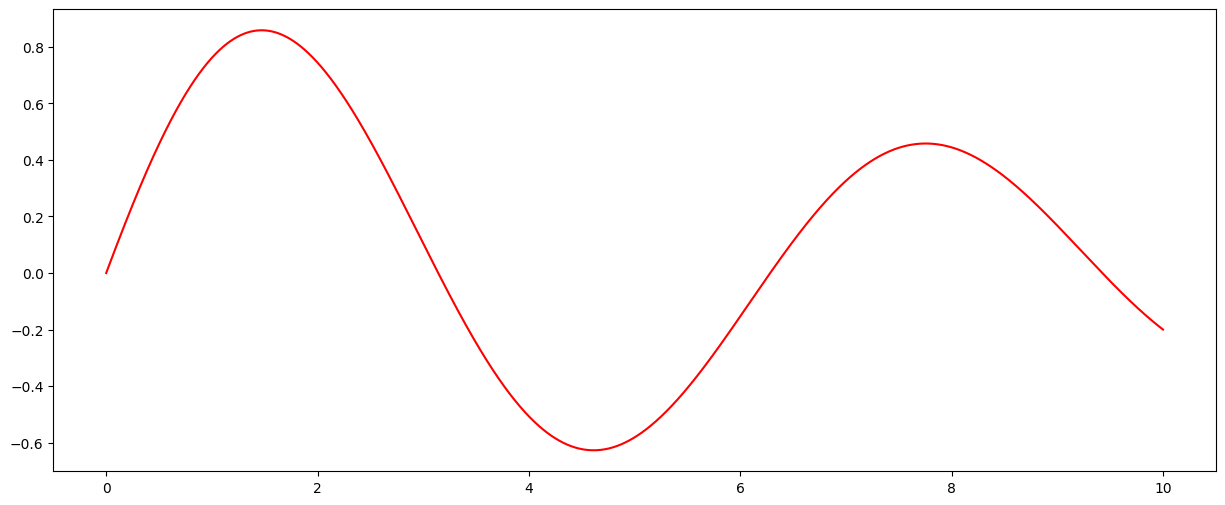

In [32]:
#1
def f(x) :
    return numpy.exp ((-x/10))*numpy.sin(x)

a, b = 0, 10

number_of_points = 100000

step = (b-a)/number_of_points

x_values, y_values = [], []

x_values = numpy.linspace(a, b, number_of_points)
y_values = f(x_values)
plt.figure(figsize=(15,6))
plt.plot(x_values,y_values,"r")
plt.show()

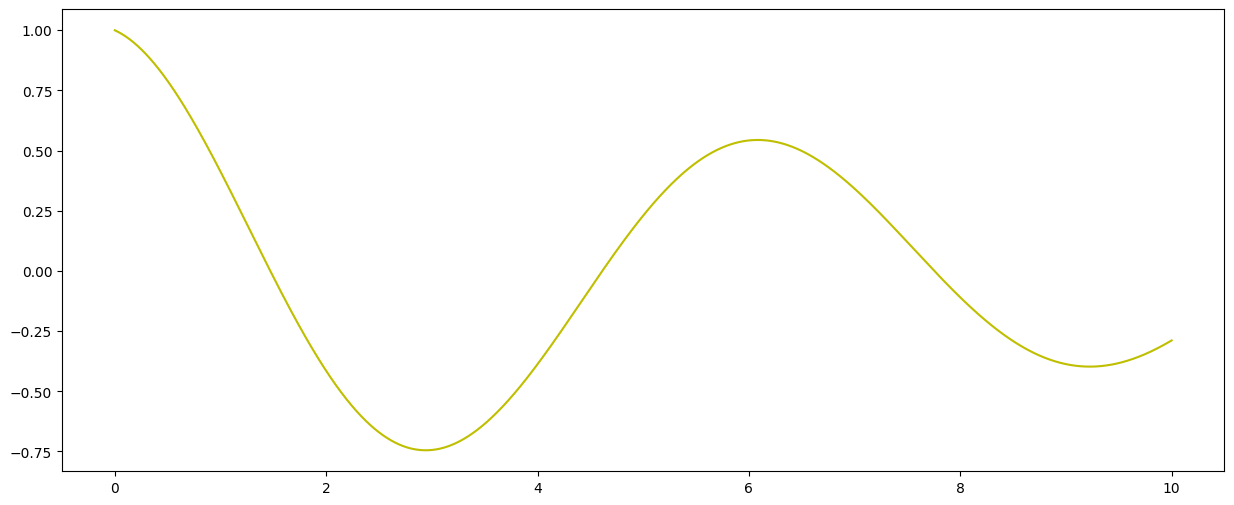

In [33]:
#2
def h(x) : # h(x) est la dérivée
    return numpy.gradient(f(x),x)
c, d = 0, 10

number_of_points = 1000000

step = (d-c)/number_of_points

xx_values, yy_values = [], []

xx_values = numpy.linspace(c, d, number_of_points)
yy_values = h(xx_values)
plt.figure(figsize=(15,6))
plt.plot(xx_values,yy_values,"y")
plt.show()

In [34]:
#3
number_of_points = 100000
c = 3
d = 7
x1 = numpy.linspace(a, b, number_of_points)
moyenne = numpy.mean(y_values[(x_values >=3) & (x_values <= 7)]) #Moyenne  sur [3,7]
œt = numpy.std(y_values[(x_values >=3) & (x_values <= 7)]) #Ecart-type sur [3,7]
print("La moyenne cherchée entre [3,7] est :",moyenne)
print("L'écart-type cherché entre [3,7] est :",œt)

La moyenne cherchée entre [3,7] est : -0.27968609409479406
L'écart-type cherché entre [3,7] est : 0.2880989392686692


In [35]:
#4: Calcul des zeros de f_prim.

#On a des solutions de h sur [0,7] contenu dans yy_values, on peut utiliser un slicing pour trouver les valeurs de x
#pour lesquelles y se rapproche de zero.
def liste_des_zeros (precision): # on lui file une précision pour ce zero
    liste = xx_values[abs(yy_values)<= precision] # A savoir que ce résultat dépend aussi du nombde de points
    return liste
liste_des_zeros (0.00001)# ici, nous considérons que 0.00001 sensiblement égale à 0


array([1.47112147, 1.47113147, 4.61270461, 4.61271461, 4.61272461,
       4.61273461, 7.75429775, 7.75430775, 7.75431775, 7.75432775])

In [41]:
#4 

# Une facon d'autre de le faire et que vous avez spécifié est la dichotomie, je l'ai essayé mais puisque
# le numpy.gradient retourne un tableau, ce n'est vraiment pas comme les autres fonctions, j'ai pas vraiment 
#réussi à bien le faire; j'ai l'idée mais ..
#la fonction f_prim retourne un tableau vide pour n'importe quelle valeur de m et on ne peut meme pas parcourir avec
#un for pour traiter les résultats.
def detecteur_de_zero (f_,a,b,precision,nb_max_iteration) : 
    solution = 0
    nb_iteration = 0
    while (nb_iteration < nb_max_iteration) & (abs(b - a) > precision) :
        m = (a+b)/2
        j = f_(m)
        if len(j) <= 0: #Ici c'est normalement f_(m)*f_(a) seulement que c'est des tableaux vides et faussent l'opération
            b = m
        else :
            a = m
        nb_iteration +=1
    solution=(a,b) # Retourne deux points formant un intervalle contenant une solution de l'équation.
    
    return solution

In [40]:
f_prim = lambda m : numpy.gradient(numpy.exp ((-m/10))*numpy.sin(m),m);
detecteur_de_zero (f_prim,0,10,0.001,1000)

(0, 0.0006103515625)

In [38]:
#5 Algo de Monte Carlo pour trouver une valeur approchée de pi


from random import *
nb_success = 0
n = 100000  #  nombre de fois

for i in range (0,n):# test n fois
    x = random()
    y = random()
    if x*x+y*y <= 1: # Si x^2+y^2 <= 1, le test courant est réussi et on augmente la valeur de c
        nb_success += 1
pi = 4*nb_success/n
print(pi)

3.14512
